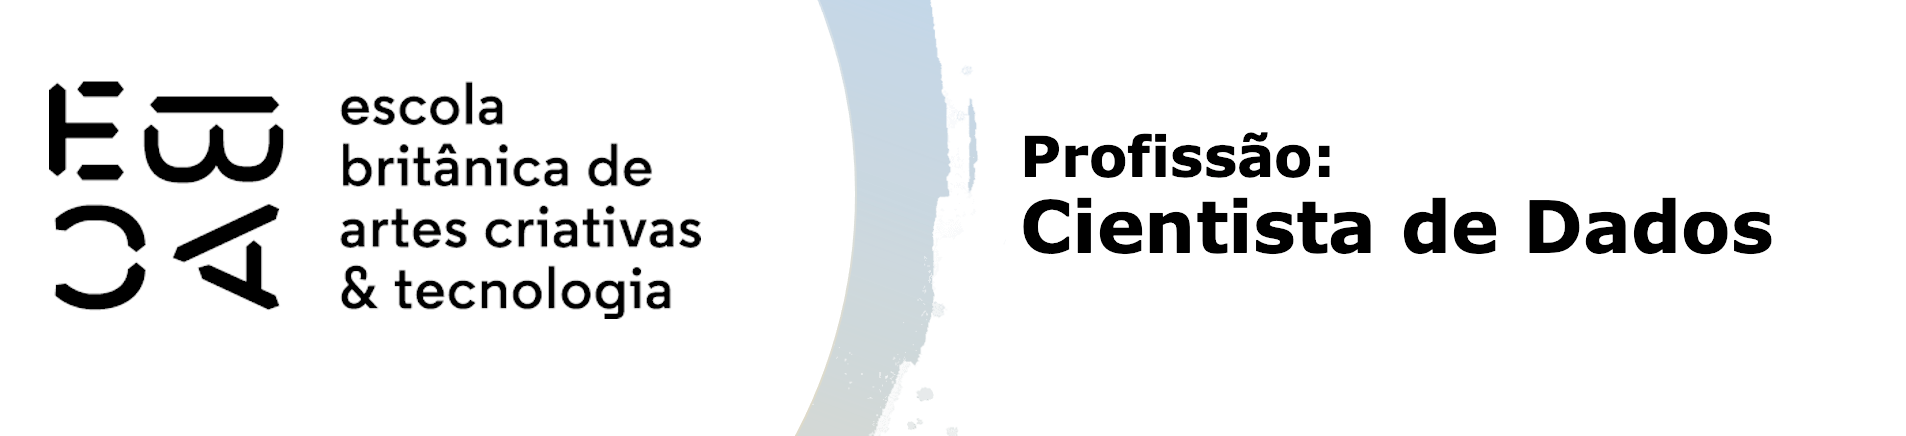

# Métodos hierárquicos de agrupamento - Tarefa

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

### Explicação do Código: Seleção de Variáveis Quantitativas no Dataset dos Pinguins

O código fornecido realiza a carga e a seleção de variáveis quantitativas (numéricas) do dataset dos pinguins, utilizando a biblioteca `seaborn`. A seguir, explicamos cada etapa do código:

1. **Carregar o Dataset dos Pinguins**  
   ```python
   penguins = sns.load_dataset('penguins')


In [3]:
# Carregar a base de dados dos pinguins
penguins = sns.load_dataset('penguins')

# Selecionar apenas as variáveis quantitativas
quantitative_variables = penguins.select_dtypes(include=['float64', 'int64'])

# Exibir as variáveis quantitativas
print("Variáveis quantitativas:")
print(quantitative_variables.columns)


Variáveis quantitativas:
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')


### Explicação do Código: Seleção de Variáveis Quantitativas no Dataset dos Pinguins (Com Tratamento de Valores Faltantes)

O objetivo do código é carregar o dataset dos pinguins, limpar dados ausentes e selecionar as variáveis quantitativas para análises futuras. Veja abaixo a explicação detalhada de cada passo:

---

## 1. Carregar a Base de Dados dos Pinguins
```python
penguins = sns.load_dataset('penguins')


In [4]:
# Carregar a base de dados dos pinguins
penguins = sns.load_dataset('penguins')

# Eliminar valores faltantes
penguins_cleaned = penguins.dropna()

# Selecionar apenas as variáveis quantitativas
quantitative_variables = penguins_cleaned.select_dtypes(include=['float64', 'int64'])

# Exibir as variáveis quantitativas sem valores faltantes
print("Variáveis quantitativas sem valores faltantes:")
print(quantitative_variables.columns)

# Visualizar os dados quantitativos limpos (opcional)
print(quantitative_variables.head())

Variáveis quantitativas sem valores faltantes:
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


### 1.1 Explicação dos Resultados

Os dados quantitativos utilizados no agrupamento incluem as variáveis **`bill_length_mm`**, **`bill_depth_mm`**, **`flipper_length_mm`** e **`body_mass_g`**, que representam características físicas dos pinguins. Esses dados não contêm valores ausentes, o que garante a integridade da análise.

Ao examinar os primeiros registros, é possível observar diferenças nas medições, como o comprimento do bico e da nadadeira, indicando variabilidade entre os pinguins. Essas diferenças são essenciais para que o algoritmo de agrupamento identifique padrões e forme clusters que possam corresponder a características naturais, como espécie, sexo ou habitat.


### Explicação do Código: Padronização de Variáveis Quantitativas no Dataset dos Pinguins

Este código realiza a carga, limpeza e padronização das variáveis quantitativas do dataset dos pinguins. A padronização é importante em análises estatísticas e


In [5]:
# Carregar a base de dados dos pinguins
penguins = sns.load_dataset('penguins')

# Eliminar valores faltantes
penguins_cleaned = penguins.dropna()

# Selecionar apenas as variáveis quantitativas
quantitative_variables = penguins_cleaned.select_dtypes(include=['float64', 'int64'])

# Padronizar as variáveis (média 0 e desvio padrão 1)
scaler = StandardScaler()
quantitative_scaled = scaler.fit_transform(quantitative_variables)

# Criar um DataFrame com as variáveis padronizadas
quantitative_scaled_df = pd.DataFrame(
    quantitative_scaled, 
    columns=quantitative_variables.columns
)

# Exibir as variáveis padronizadas
print("Variáveis quantitativas padronizadas:")
print(quantitative_scaled_df.head())

Variáveis quantitativas padronizadas:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


### 1.2 Explicação dos Resultados

O conjunto de dados contém variáveis quantitativas que representam características físicas dos pinguins. Essas variáveis incluem:

- **`bill_length_mm`**: Comprimento do bico do pinguim em milímetros.
- **`bill_depth_mm`**: Profundidade do bico do pinguim em milímetros.
- **`flipper_length_mm`**: Comprimento da nadadeira do pinguim em milímetros.
- **`body_mass_g`**: Massa corporal do pinguim em gramas.

### Limpeza e Padronização dos Dados

1. **Remoção de Valores Faltantes**: O conjunto de dados foi limpo eliminando-se as linhas que continham valores ausentes, garantindo a integridade da análise.

2. **Seleção de Variáveis Quantitativas**: Apenas variáveis numéricas (tipos `float64` ou `int64`) foram selecionadas para a análise.

3. **Padronização**:
   - Os dados foram padronizados para ter uma média igual a 0 e desvio padrão igual a 1.
   - Isso foi feito utilizando o `StandardScaler` da biblioteca `sklearn`.
   - A padronização garante que todas as variáveis contribuam igualmente para a análise ou agrupamento, independentemente de suas escalas ou unidades originais.

### Dados Padronizados

Os valores padronizados para os primeiros cinco registros são apresentados. Esses valores representam o desvio de cada medida em relação à média, em termos de desvios padrão. Por exemplo:
- Um valor de **-0.896042** para `bill_length_mm` na primeira linha indica que o comprimento do bico está cerca de 0,896 desvios padrão abaixo da média.
- De forma semelhante, um valor de **0.780732** para `bill_depth_mm` na primeira linha mostra que a profundidade do bico está cerca de 0,78 desvios padrão acima da média.

### Insights

Os dados padronizados destacam a variabilidade nas medidas físicas dos pinguins, o que pode ser utilizado posteriormente para tarefas como agrupamento (clustering) ou classificação. Com a padronização:
- A influência de variáveis com escalas maiores (por exemplo, `body_mass_g`) é neutralizada.
- Padrões, como diferenças entre espécies ou agrupamentos naturais, podem ser identificados de forma mais eficaz.


##  2 Dendrograma

### Explicação do Código: Agrupamento Hierárquico com Dados Padronizados do Dataset dos Pinguins

Este código carrega, limpa, padroniza as variáveis quantitativas do dataset dos pinguins e aplica agrupamento hierárquico, seguido da visualização dos clusters atribuídos. Aqui está a explicação passo a passo:

---

#### 1. Carregar a Base de Dados dos Pinguins
```python
penguins = sns.load_dataset('penguins')


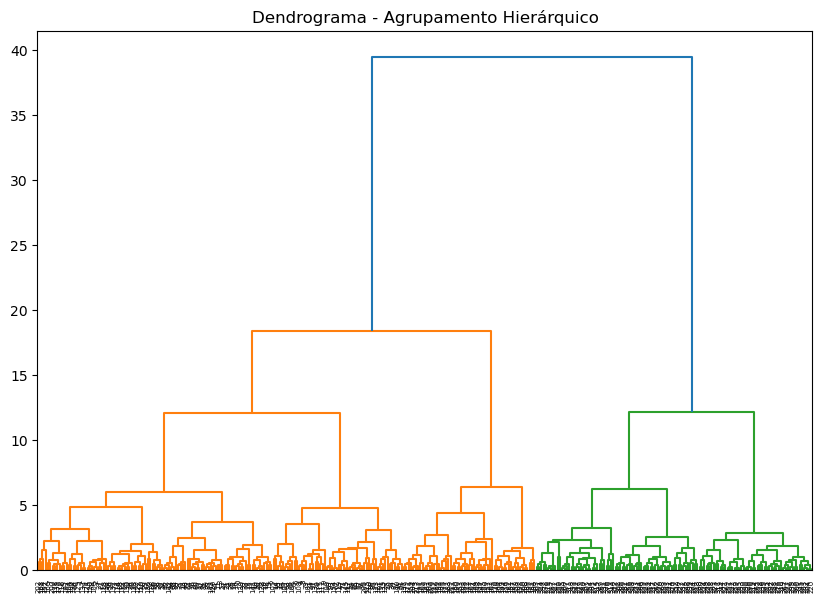

Dados com os clusters atribuídos:
   Cluster  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        3            39.1           18.7              181.0       3750.0
1        3            39.5           17.4              186.0       3800.0
2        3            40.3           18.0              195.0       3250.0
4        3            36.7           19.3              193.0       3450.0
5        3            39.3           20.6              190.0       3650.0


/var/folders/td/pzcjg6tx463_h0b085tpbyv00000gn/T/ipykernel_73756/2534421674.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_cleaned.loc[:, 'Cluster'] = clusters


In [10]:
# Carregar a base de dados dos pinguins
penguins = sns.load_dataset('penguins')

# Eliminar valores faltantes
penguins_cleaned = penguins.dropna()

# Selecionar apenas as variáveis quantitativas
quantitative_variables = penguins_cleaned.select_dtypes(include=['float64', 'int64'])

# Padronizar as variáveis (média 0 e desvio padrão 1)
scaler = StandardScaler()
quantitative_scaled = scaler.fit_transform(quantitative_variables)

# Realizar o agrupamento hierárquico
linked = linkage(quantitative_scaled, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrograma - Agrupamento Hierárquico")
plt.show()

# Dividir a base em 3 grupos
clusters = fcluster(linked, t=3, criterion='maxclust')

# Adicionar os clusters ao DataFrame original
penguins_cleaned.loc[:, 'Cluster'] = clusters

# Visualizar os primeiros resultados
print("Dados com os clusters atribuídos:")
print(penguins_cleaned[['Cluster'] + list(quantitative_variables.columns)].head())


#### 2.1 Dendrograma - Agrupamento Hierárquico

O dendrograma abaixo mostra o resultado do agrupamento hierárquico realizado com as variáveis quantitativas dos pinguins. Cada linha no eixo X representa um indivíduo, enquanto o eixo Y indica a distância ou similaridade entre os agrupamentos. As cores destacam os diferentes clusters formados.

![Dendrograma - Agrupamento Hierárquico](caminho_para_o_dendrograma.png)

---

#### Dados com os Clusters Atribuídos

Os dados após o agrupamento incluem os clusters atribuídos para cada pinguim com base em suas características físicas. A tabela a seguir apresenta algumas amostras dos dados com o respectivo cluster:

| Cluster | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g |
|---------|----------------|---------------|-------------------|-------------|
| 3       | 39.1           | 18.7          | 181.0             | 3750.0      |
| 3       | 39.5           | 17.4          | 186.0             | 3800.0      |
| 3       | 40.3           | 18.0          | 195.0             | 3250.0      |
| 3       | 36.7           | 19.3          | 193.0             | 3450.0      |
| 3       | 39.3           | 20.6          | 190.0             | 3650.0      |

Os clusters identificam padrões entre os pinguins, agrupando-os com base em similaridades nas medidas de comprimento do bico, profundidade do bico, comprimento da nadadeira e massa corporal.


## 3) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

### Explicação do Código: Agrupamento Hierárquico com Dados Padronizados do Dataset dos Pinguins

Este código carrega, limpa, padroniza as variáveis quantitativas do dataset dos pinguins e aplica agrupamento hierárquico, seguido da visualização dos clusters atribuídos. Aqui está a explicação passo a passo:

#### 1. Carregar a Base de Dados dos Pinguins
```python
penguins = sns.load_dataset('penguins')


In [15]:
# Contar o número de pinguins por espécie e ilha
penguins_group_count = penguins.groupby(['species', 'island']).size().reset_index(name='count')

# Exibir os resultados
print(penguins_group_count)

     species     island  count
0     Adelie     Biscoe     44
1     Adelie      Dream     56
2     Adelie  Torgersen     52
3  Chinstrap      Dream     68
4     Gentoo     Biscoe    124


#### Análise dos resultados

- A espécie **Adelie** está distribuída em três ilhas: Biscoe, Dream e Torgersen, com contagens semelhantes.
- A espécie **Chinstrap** é encontrada apenas na ilha Dream.
- A espécie **Gentoo** está concentrada exclusivamente na ilha Biscoe, com a maior contagem entre as espécies.


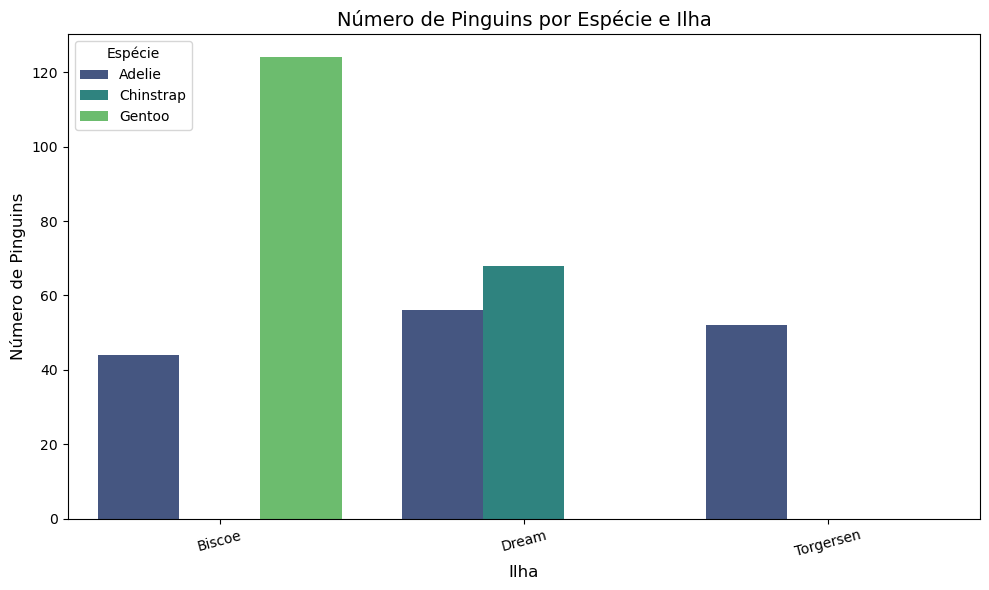

In [16]:
# Contar o número de pinguins por espécie e ilha
penguins_group_count = penguins.groupby(['species', 'island']).size().reset_index(name='count')

# Criar um gráfico de barras para visualizar os dados
plt.figure(figsize=(10, 6))
sns.barplot(
    data=penguins_group_count,
    x='island',
    y='count',
    hue='species',
    palette='viridis'
)

# Adicionar título e rótulos
plt.title('Número de Pinguins por Espécie e Ilha', fontsize=14)
plt.xlabel('Ilha', fontsize=12)
plt.ylabel('Número de Pinguins', fontsize=12)
plt.legend(title='Espécie')
plt.xticks(rotation=15)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

### Explicação do Código

Este código realiza o agrupamento hierárquico dos dados escalados (`quantitative_scaled`) utilizando o método de Ward, que minimiza a soma dos quadrados dentro de cada grupo. Em seguida, é gerado um dendrograma para visualizar as relações hierárquicas entre as amostras, com títulos e rótulos personalizados. Uma linha horizontal pontilhada em `y=10` é adicionada como referência para identificar o possível número ideal de grupos. O gráfico é exibido para análise visual.


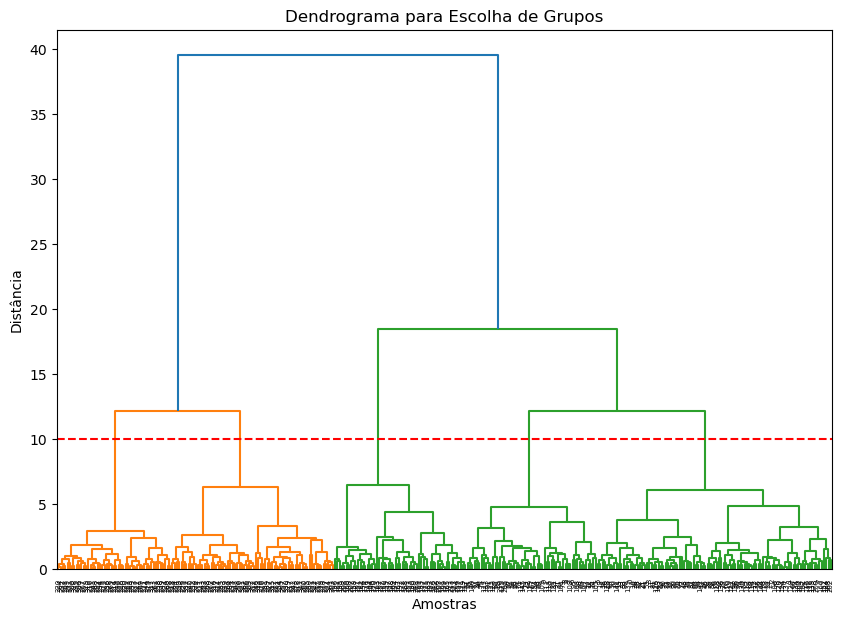

In [17]:
# Aplicar o método de linkage para agrupamento hierárquico
linkage_matrix = linkage(quantitative_scaled, method='ward')

# Gerar o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma para Escolha de Grupos")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.axhline(y=10, color='r', linestyle='--')  # Ajustar a linha como referência visual
plt.show()


#### Explicação do Código

Este código define o número de grupos (`num_grupos`) com base na análise visual do dendrograma e utiliza a função `fcluster` para atribuir cada amostra a um cluster. O valor `4` pode ser ajustado conforme o corte do dendrograma. Os clusters resultantes são adicionados ao DataFrame original (`quantitative_scaled_df`) em uma nova coluna chamada `cluster`. Por fim, os primeiros registros do DataFrame atualizado são exibidos para verificação.


In [18]:
# Escolha o número de grupos do dendrograma (substitua o 4 pelo valor sugerido)
num_grupos = 4
clusters = fcluster(linkage_matrix, num_grupos, criterion='maxclust')

# Adicionar os grupos ao DataFrame original
quantitative_scaled_df['cluster'] = clusters

# Visualizar os primeiros resultados
print(quantitative_scaled_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0       -0.896042       0.780732          -1.426752    -0.568475        4
1       -0.822788       0.119584          -1.069474    -0.506286        4
2       -0.676280       0.424729          -0.426373    -1.190361        4
3       -1.335566       1.085877          -0.569284    -0.941606        4
4       -0.859415       1.747026          -0.783651    -0.692852        4


### Resultados
O DataFrame atualizado agora inclui uma nova coluna chamada `cluster`, que indica a atribuição de cada amostra a um dos 4 grupos definidos. As primeiras linhas do DataFrame mostram os valores das variáveis escaladas e o respectivo cluster ao qual cada amostra pertence.

### Explicação do Código

Este código utiliza um scatterplot para visualizar os grupos formados pelo agrupamento hierárquico:


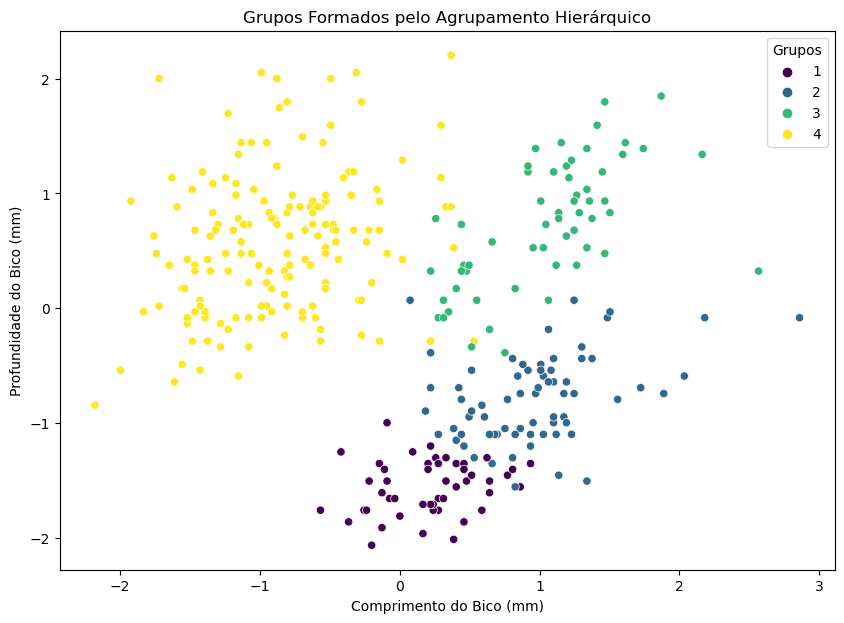

In [19]:
# Visualizar os grupos em um scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=quantitative_scaled_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='cluster',
    palette='viridis'
)
plt.title("Grupos Formados pelo Agrupamento Hierárquico")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Profundidade do Bico (mm)")
plt.legend(title="Grupos")
plt.show()

### Resultados do Agrupamento Hierárquico

1. **Grupo 1 (Roxo)**: Este grupo concentra observações com valores baixos tanto no comprimento quanto na profundidade do bico, indicando características menores em ambas as dimensões.

2. **Grupo 2 (Azul)**: Formado por observações com comprimento médio e profundidade também média. Este grupo parece ser uma transição entre os extremos.

3. **Grupo 3 (Verde)**: Observações com maiores valores de comprimento e profundidade do bico. Este grupo é caracterizado por dimensões superiores.

4. **Grupo 4 (Amarelo)**: Inclui as observações com profundidade baixa e comprimento intermediário. Este grupo é claramente separado do grupo verde, sugerindo que o algoritmo capturou diferenças significativas entre esses padrões.

A análise mostra que o algoritmo de agrupamento hierárquico conseguiu dividir os dados em quatro grupos coerentes, baseando-se em similaridades entre os comprimentos e profundidades dos bicos.


In [23]:
# Contar o número de pinguins de cada espécie em cada grupo
species_count_per_group = penguins_cleaned.groupby(['Cluster', 'species']).size().reset_index(name='count')

# Contar o número de pinguins de cada espécie, machos e fêmeas em cada grupo
species_gender_count_per_group = penguins_cleaned.groupby(['Cluster', 'species', 'sex']).size().reset_index(name='count')

# Exibir os resultados no console
print("Número de pinguins por Cluster e Espécie:")
print(species_count_per_group)

print("\nNúmero de pinguins por Cluster, Espécie e Sexo:")
print(species_gender_count_per_group)


Número de pinguins por Cluster e Espécie:
   Cluster    species  count
0        1     Gentoo    119
1        2  Chinstrap     57
2        3     Adelie    146
3        3  Chinstrap     11

Número de pinguins por Cluster, Espécie e Sexo:
   Cluster    species     sex  count
0        1     Gentoo  Female     58
1        1     Gentoo    Male     61
2        2  Chinstrap  Female     23
3        2  Chinstrap    Male     34
4        3     Adelie  Female     73
5        3     Adelie    Male     73
6        3  Chinstrap  Female     11


In [24]:
# Salvar os resultados em arquivos CSV
species_count_per_group.to_csv("species_count_per_group.csv", index=False)
species_gender_count_per_group.to_csv("species_gender_count_per_group.csv", index=False)
print("Os resultados foram salvos como arquivos CSV.")


Os resultados foram salvos como arquivos CSV.


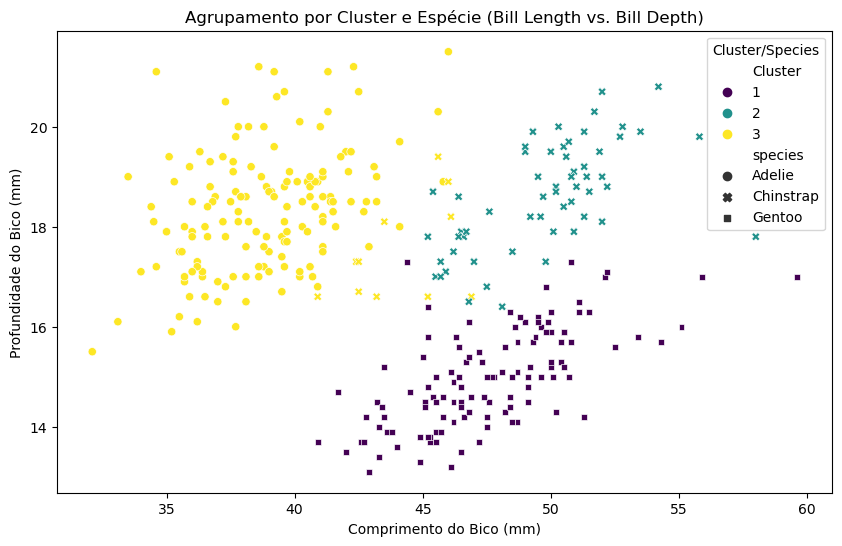


Distribuição de Espécies em cada Cluster:
   Cluster    species  count
0        1     Gentoo    119
1        2  Chinstrap     57
2        3     Adelie    146
3        3  Chinstrap     11

Distribuição de Sexo por Cluster e Espécie:
   Cluster    species     sex  count
0        1     Gentoo  Female     58
1        1     Gentoo    Male     61
2        2  Chinstrap  Female     23
3        2  Chinstrap    Male     34
4        3     Adelie  Female     73
5        3     Adelie    Male     73
6        3  Chinstrap  Female     11


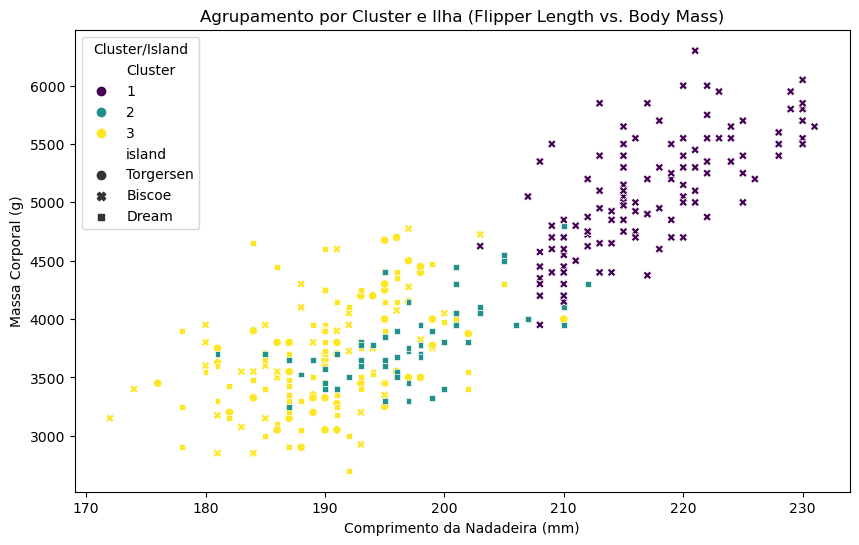


Distribuição de Ilhas em cada Cluster:
   Cluster     island  count
0        1     Biscoe    119
1        2      Dream     57
2        3     Biscoe     44
3        3      Dream     66
4        3  Torgersen     47


In [25]:
# Visualizar os agrupamentos por espécie
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=penguins_cleaned,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='Cluster',
    style='species',
    palette='viridis'
)
plt.title("Agrupamento por Cluster e Espécie (Bill Length vs. Bill Depth)")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Profundidade do Bico (mm)")
plt.legend(title="Cluster/Species")
plt.show()

# Verificar correspondência entre clusters e espécies
species_cluster_counts = penguins_cleaned.groupby(['Cluster', 'species']).size().reset_index(name='count')
print("\nDistribuição de Espécies em cada Cluster:")
print(species_cluster_counts)

# Análise por sexo dentro dos clusters
gender_cluster_counts = penguins_cleaned.groupby(['Cluster', 'species', 'sex']).size().reset_index(name='count')
print("\nDistribuição de Sexo por Cluster e Espécie:")
print(gender_cluster_counts)

# Visualizar os agrupamentos por ilha
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=penguins_cleaned,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='Cluster',
    style='island',
    palette='viridis'
)
plt.title("Agrupamento por Cluster e Ilha (Flipper Length vs. Body Mass)")
plt.xlabel("Comprimento da Nadadeira (mm)")
plt.ylabel("Massa Corporal (g)")
plt.legend(title="Cluster/Island")
plt.show()

# Verificar correspondência entre clusters e ilhas
island_cluster_counts = penguins_cleaned.groupby(['Cluster', 'island']).size().reset_index(name='count')
print("\nDistribuição de Ilhas em cada Cluster:")
print(island_cluster_counts)
